<a href="https://colab.research.google.com/github/sainiketh372/RBL_Project/blob/main/Retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/code/mahipalsingh/detection-using-keras-retinanet-train

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git


Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 32.33 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.


In [ ]:
# Install dependencies

%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=177717 sha256=0bded4302df949b8b6cd0874b65c0761dca6eef0f975dfc8d621d4eb7a6fb498
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20459 sha256=8ded472c1613b09177100ef1e17668e750c52920dab828ccb74587d696985c7a
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace


/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-cpython-310/keras_retinanet/utils/compute_overlap.cpython-310-x86_64-linux-gnu.so -> keras_retinanet/utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image

In [ ]:
from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
# Download pretrained retinanet weights which are tained on coco dataset

urllib.request.urlretrieve('https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5', 'resnet50_coco_best_v2.1.0.h5')

('resnet50_coco_best_v2.1.0.h5', <http.client.HTTPMessage at 0x7f900a56de40>)

In [ ]:
!ls -la


total 149200
drwxr-xr-x 11 root root      4096 Jun  2 11:31 .
drwxr-xr-x  1 root root      4096 Jun  2 11:30 ..
drwxr-xr-x  5 root root      4096 Jun  2 11:29 build
-rw-r--r--  1 root root      1209 Jun  2 11:28 .codecov.yml
-rw-r--r--  1 root root      1393 Jun  2 11:28 CONTRIBUTORS.md
drwxr-xr-x  2 root root      4096 Jun  2 11:28 examples
drwxr-xr-x  8 root root      4096 Jun  2 11:28 .git
drwxr-xr-x  3 root root      4096 Jun  2 11:28 .github
-rw-r--r--  1 root root       273 Jun  2 11:28 .gitignore
-rw-r--r--  1 root root       116 Jun  2 11:28 .gitmodules
drwxr-xr-x  2 root root      4096 Jun  2 11:28 images
drwxr-xr-x 10 root root      4096 Jun  2 11:31 keras_retinanet
drwxr-xr-x  2 root root      4096 Jun  2 11:29 keras_retinanet.egg-info
-rw-r--r--  1 root root     11357 Jun  2 11:28 LICENSE
-rw-r--r--  1 root root     21234 Jun  2 11:28 README.md
-rw-r--r--  1 root root       205 Jun  2 11:28 requirements.txt
-rw-r--r--  1 root root 152662144 Jun  2 11:31 resnet50_coco_best_v

In [ ]:
# Load the model

model = models.load_model('resnet50_coco_best_v2.1.0.h5')

In [ ]:
# Download coco dataset labels

urllib.request.urlretrieve('https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt', 'coco-labels-paper.txt')

('coco-labels-paper.txt', <http.client.HTTPMessage at 0x7f8faeae2320>)

In [ ]:
!ls -la


total 149204
drwxr-xr-x 11 root root      4096 Jun  2 11:33 .
drwxr-xr-x  1 root root      4096 Jun  2 11:30 ..
drwxr-xr-x  5 root root      4096 Jun  2 11:29 build
-rw-r--r--  1 root root       702 Jun  2 11:33 coco-labels-paper.txt
-rw-r--r--  1 root root      1209 Jun  2 11:28 .codecov.yml
-rw-r--r--  1 root root      1393 Jun  2 11:28 CONTRIBUTORS.md
drwxr-xr-x  2 root root      4096 Jun  2 11:28 examples
drwxr-xr-x  8 root root      4096 Jun  2 11:28 .git
drwxr-xr-x  3 root root      4096 Jun  2 11:28 .github
-rw-r--r--  1 root root       273 Jun  2 11:28 .gitignore
-rw-r--r--  1 root root       116 Jun  2 11:28 .gitmodules
drwxr-xr-x  2 root root      4096 Jun  2 11:28 images
drwxr-xr-x 10 root root      4096 Jun  2 11:31 keras_retinanet
drwxr-xr-x  2 root root      4096 Jun  2 11:29 keras_retinanet.egg-info
-rw-r--r--  1 root root     11357 Jun  2 11:28 LICENSE
-rw-r--r--  1 root root     21234 Jun  2 11:28 README.md
-rw-r--r--  1 root root       205 Jun  2 11:28 requirements.tx

In [ ]:
class_labels = [label.rstrip() for label in open("coco-labels-paper.txt")]
print(class_labels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [ ]:
def detect_draw_bounding_boxes(img_path, threshold=0.6):
    # Read image
    img = np.array(Image.open(img_path))
    print(f"Shape of the image: {img.shape}")

    # Remove the alpha channel from image
    img = img[:,:,:3]

    # Preprocess and resize - mean subtraction and scaling
    img_proc = preprocess_image(img)
    img_proc, scale = resize_image(img_proc)

    print(f"Shape of the pre processed image: {img_proc.shape}")

    boxes, scores, labels = model.predict_on_batch(np.expand_dims(img_proc, axis=0))

    # Stadardize teh boxes
    boxes /= scale

    for box, score, label in zip(boxes[0], scores[0], labels[0]):

        if score < threshold:
            break

        box = box.astype(np.int32) # Box has to be interger
        color = label_color(label)
        draw_box(img, box, color=color)


        class_label = class_labels[label]
        caption = f"{class_label} {score:.3f}"
        draw_caption(img, box, caption)

    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [ ]:
!wget https://c0.wallpaperflare.com/preview/814/948/832/de6l8nfk6nqltrackcl9liu6ss.jpg


--2023-06-02 11:34:18--  https://c0.wallpaperflare.com/preview/814/948/832/de6l8nfk6nqltrackcl9liu6ss.jpg
Resolving c0.wallpaperflare.com (c0.wallpaperflare.com)... 104.21.235.72, 104.21.235.71, 2606:4700:3038::6815:eb47, ...
Connecting to c0.wallpaperflare.com (c0.wallpaperflare.com)|104.21.235.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95943 (94K) [image/jpeg]
Saving to: ‘de6l8nfk6nqltrackcl9liu6ss.jpg’

de6l8nfk6nqltrackcl 100%[===================>]  93.69K  --.-KB/s    in 0.02s   

2023-06-02 11:34:19 (4.07 MB/s) - ‘de6l8nfk6nqltrackcl9liu6ss.jpg’ saved [95943/95943]



Shape of the image: (607, 910, 3)
Shape of the pre processed image: (800, 1199, 3)


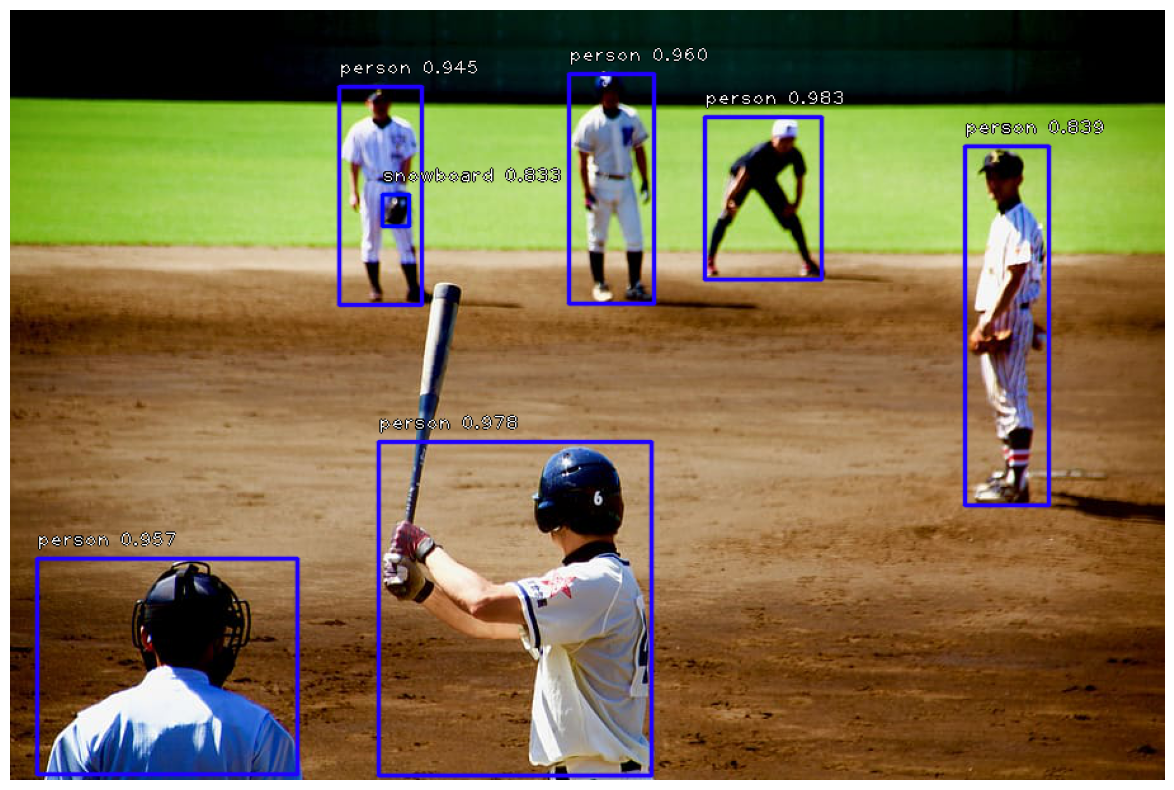

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
detect_draw_bounding_boxes('de6l8nfk6nqltrackcl9liu6ss.jpg')

In [ ]:
!wget https://i1.wp.com/www.chakracommunity.com/wp-content/uploads/2016/01/bigstock-Busy-Street-in-Manhattan-93909977.jpg


--2023-06-02 11:34:42--  https://i1.wp.com/www.chakracommunity.com/wp-content/uploads/2016/01/bigstock-Busy-Street-in-Manhattan-93909977.jpg
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949697 (1.9M) [image/jpeg]
Saving to: ‘bigstock-Busy-Street-in-Manhattan-93909977.jpg’

bigstock-Busy-Stree 100%[===================>]   1.86M  10.3MB/s    in 0.2s    

2023-06-02 11:34:43 (10.3 MB/s) - ‘bigstock-Busy-Street-in-Manhattan-93909977.jpg’ saved [1949697/1949697]



Shape of the image: (1067, 1600, 3)
Shape of the pre processed image: (800, 1200, 3)


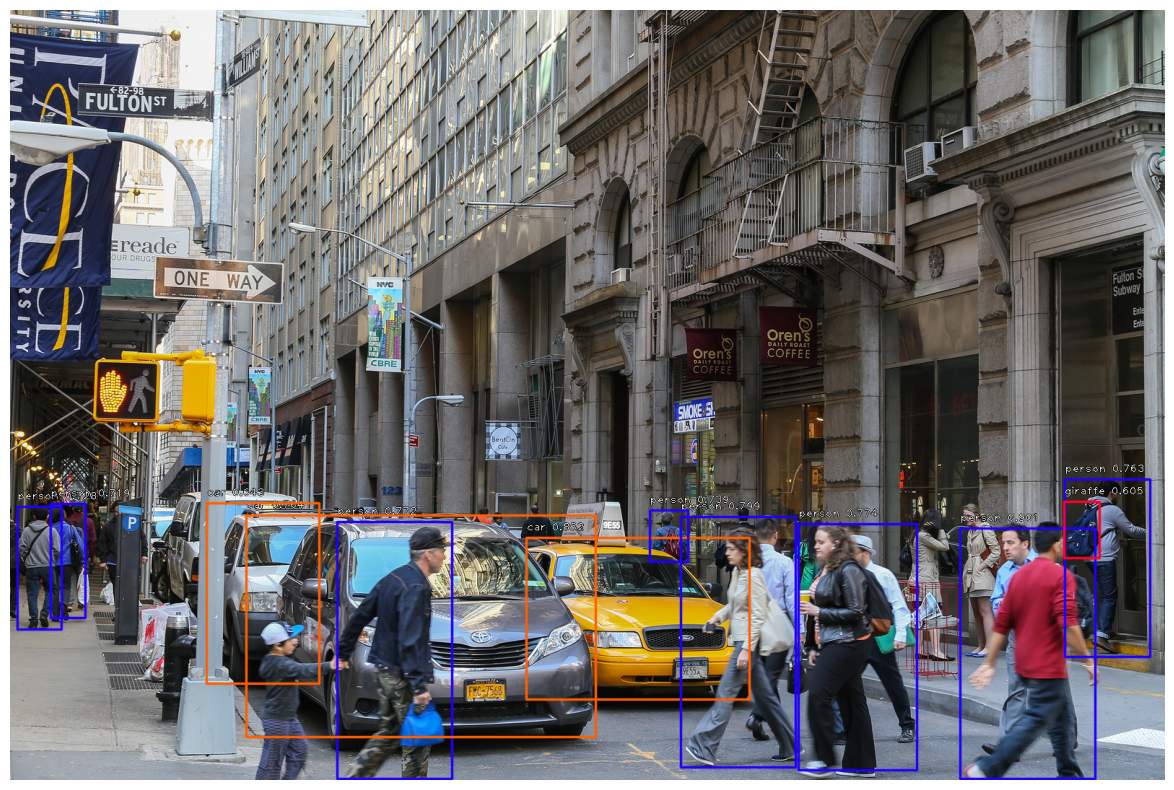

In [ ]:
detect_draw_bounding_boxes('bigstock-Busy-Street-in-Manhattan-93909977.jpg')
